# **1. Dataset Introduction**



**Dataset Source**
   
This dataset is obtained from kaggle, namely Dataset Kesejahteraan Pekerja Indonesia
   
This dataset has 2176 rows and 9 columns with categorical and numerical columns.

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Load the merged dataset
df = pd.read_csv('dataset_clustering.csv')

# Show top 5 data
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,1900000.0,466355.0,11226
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,1900000.0,466355.0,11226
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2118500.0,548853.0,13627
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2118500.0,548853.0,13627
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,1900000.0,395136.0,11226


# **4. Exploratory Data Analysis (EDA)**

In [ ]:
# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display data types and non-null values
df.info()

Dataset contains 2176 rows and 9 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  2176 non-null   object 
 1   jenis     2176 non-null   object 
 2   daerah    2176 non-null   object 
 3   tahun     2176 non-null   int64  
 4   periode   2176 non-null   object 
 5   gk        2144 non-null   float64
 6   ump       2176 non-null   float64
 7   peng      2144 non-null   float64
 8   upah      2176 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 153.1+ KB


As can be seen here, the dataset contains 4 categorical and 5 numeric columns

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Filter for columns with missing values
missing_values = missing_values[missing_values > 0]

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame for display
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)  # Round to 2 decimal places
})

# Display the DataFrame
print(missing_df)

      Missing Values  Percentage
gk                32        1.47
peng              32        1.47


Here I find out how many missing values there are.
And it turns out that the percentage of minssing values to the data is quite small.

In [ ]:
# Summary statistics
df.describe()

,tahun,gk,ump,peng,upah
count,2176.000000,2144.000000,2.176000e+03,2.144000e+03,2176.000000
mean,2018.500000,228034.756530,2.310701e+06,5.701367e+05,16651.562500
std,2.291815,126370.388039,6.083094e+05,1.781897e+05,4410.468772
min,2015.000000,48561.000000,9.100000e+05,1.760280e+05,8525.000000
25%,2016.750000,111752.000000,1.873750e+06,4.342870e+05,13445.500000
50%,2018.500000,212337.000000,2.267356e+06,5.584700e+05,15856.500000
75%,2020.250000,327492.500000,2.699206e+06,6.790842e+05,18863.000000
max,2022.000000,641806.000000,4.641854e+06,1.572026e+06,32685.000000


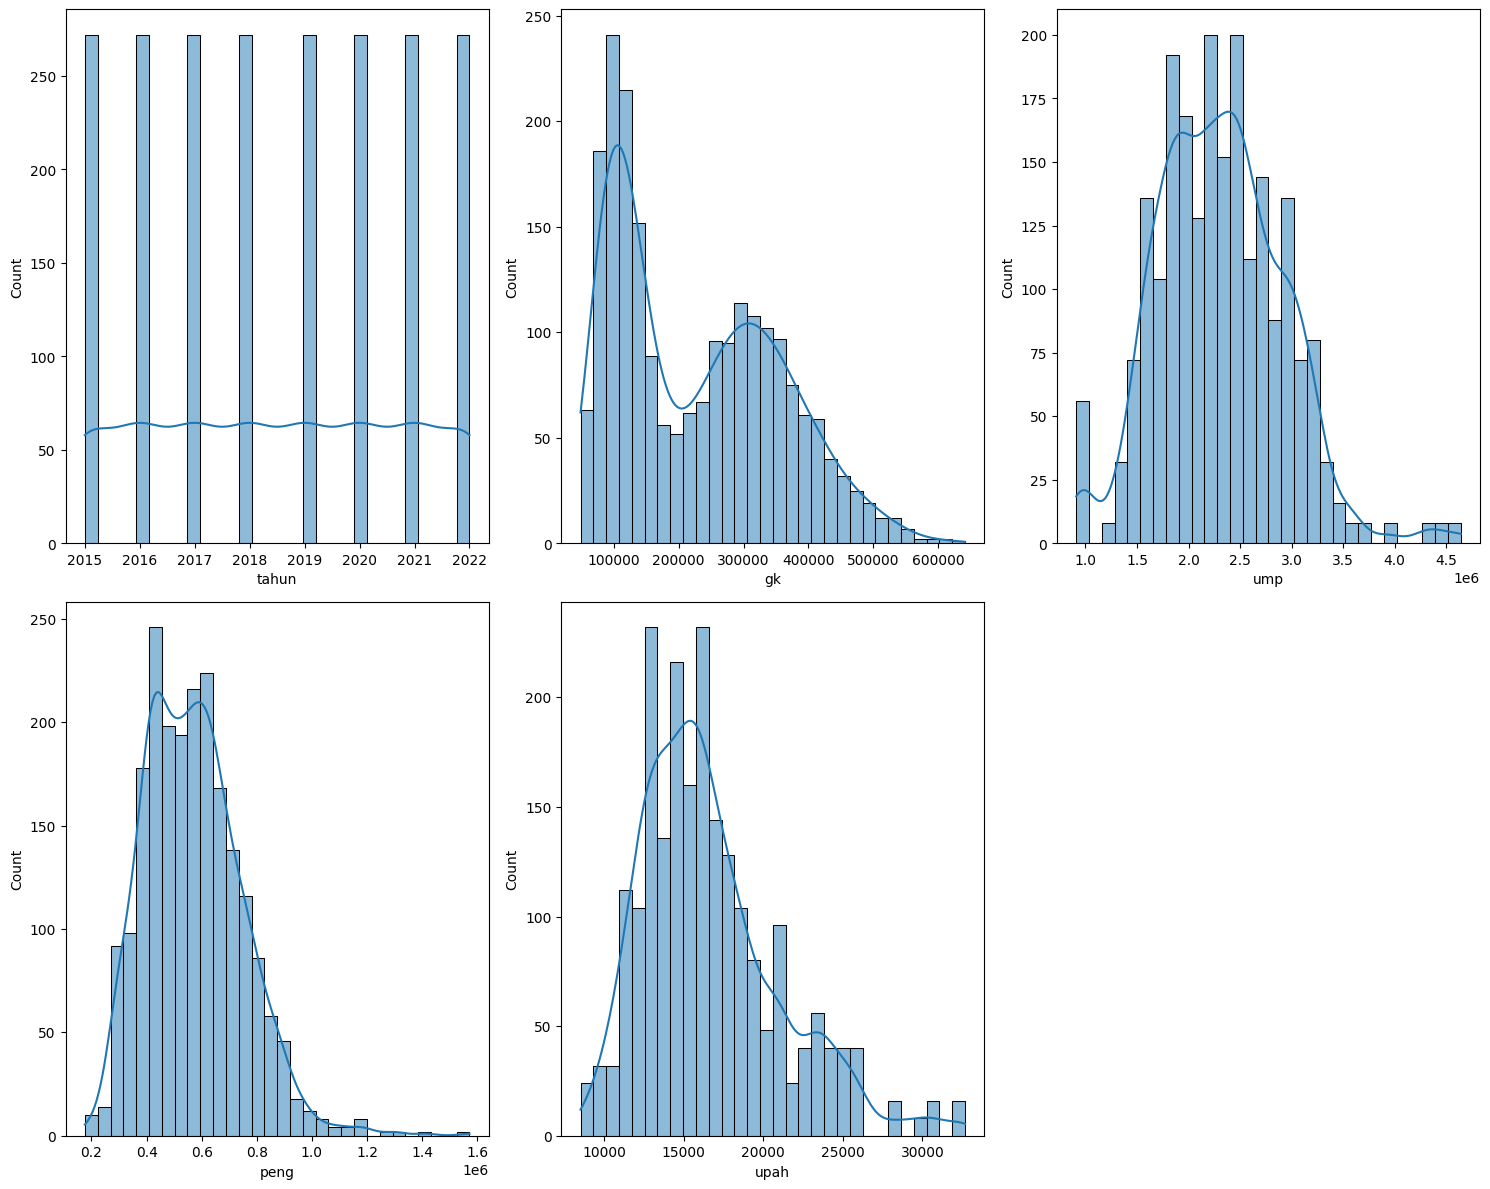

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot histograms with KDE
plt.figure(figsize=(15, 12))
for col in numeric_cols:
    plt.subplot(len(numeric_cols)//3 + 1, 3, numeric_cols.get_loc(col) + 1)
    sns.histplot(df[col], kde=True, bins=30, edgecolor='black')

plt.tight_layout()
plt.show()

Data Distribution by Feature
1. Tahun

The year distribution is very even from 2015 to 2022.

The KDE line is flat → supporting that the number of years is almost equal.

2. gk (Poverty Line)

Right-skewed distribution: the majority of poverty line values are below 300,000.

There is a small number of observations with gk values above 500,000, which may come from provinces with a high cost of living.

There are two peaks (bimodal), possibly indicating differences between urban and rural areas.

3. ump (Provincial Minimum Wage)

The distribution is also right-skewed, but more normal than gk.

The main peak is around 2 million-2.5 million.

There are outliers or data with very high UMP values (above 4 million), most likely this is data from DKI Jakarta or other developed regions.

4. peng (Per capita expenditure)

Similar to ump, the shape is right skewed with a main peak around 400,000-600,000.

The distribution is somewhat bimodal, which could be due to lifestyle differences between urban and rural areas.

Outliers are also evident above 1 million, which could be representative of large cities.

5. upah (Hourly labor wage)

The distribution is smoother and peaks at around 15,000.

Right-skewed, but not too extreme.

Very high upah values (above 25,000) are quite rare, possibly representing specific provinces or labor sectors that pay well.

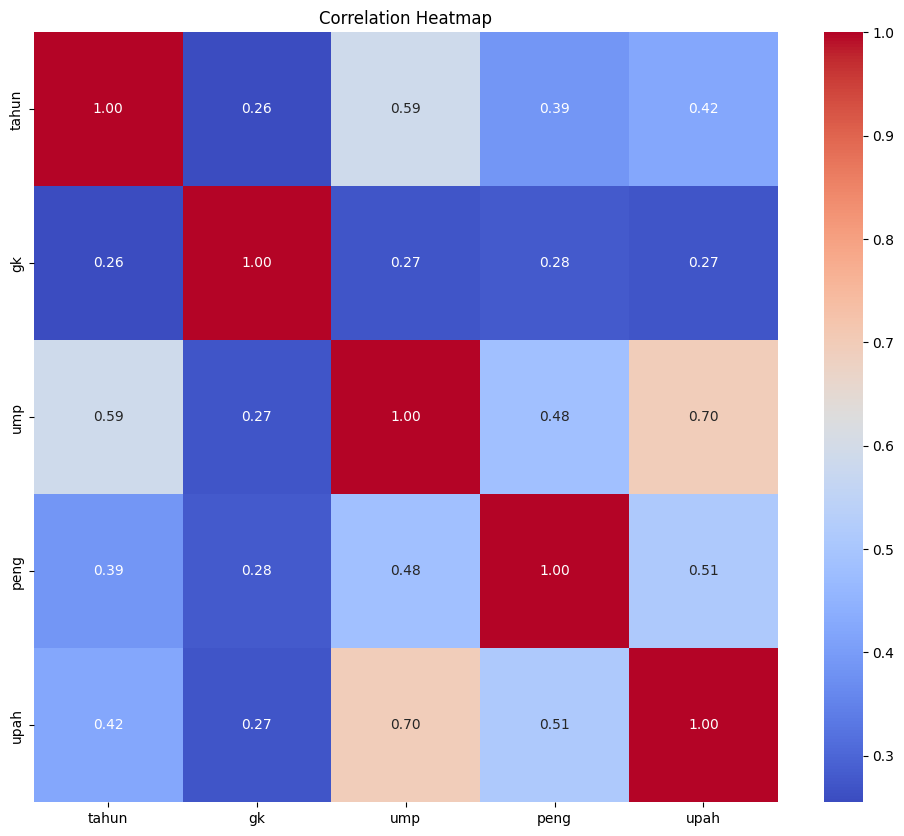

In [ ]:
# Correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1. Strong Correlation:

  UMP ↔ Upah (0.70) → When UMP increases, upah also tends to rise. UMP can be an important indicator for predicting upah.

2. Moderate Correlation:

  Upah ↔ Pengeluaran (0.51) → Regions with higher living costs tend to offer higher upah.

  UMP ↔ Pengeluaran (0.48) → As pengeluaran increases, UMP also tends to rise.

  Tahun ↔ UMP (0.59) & Tahun ↔ Upah (0.42) → Both UMP and upah tend to increase over the years.

3. Weak Correlation:

  Garis Kemiskinan (gk) shows weak correlation with all variables → likely influenced by other factors such as the price of basic needs.

**Key Insight:**

UMP is a crucial feature for predicting upah due to its strong correlation.

Cost of living (peng) also plays a role in the rise and fall of both UMP and upah.

The time trend (tahun) shows a gradual increase over the years.

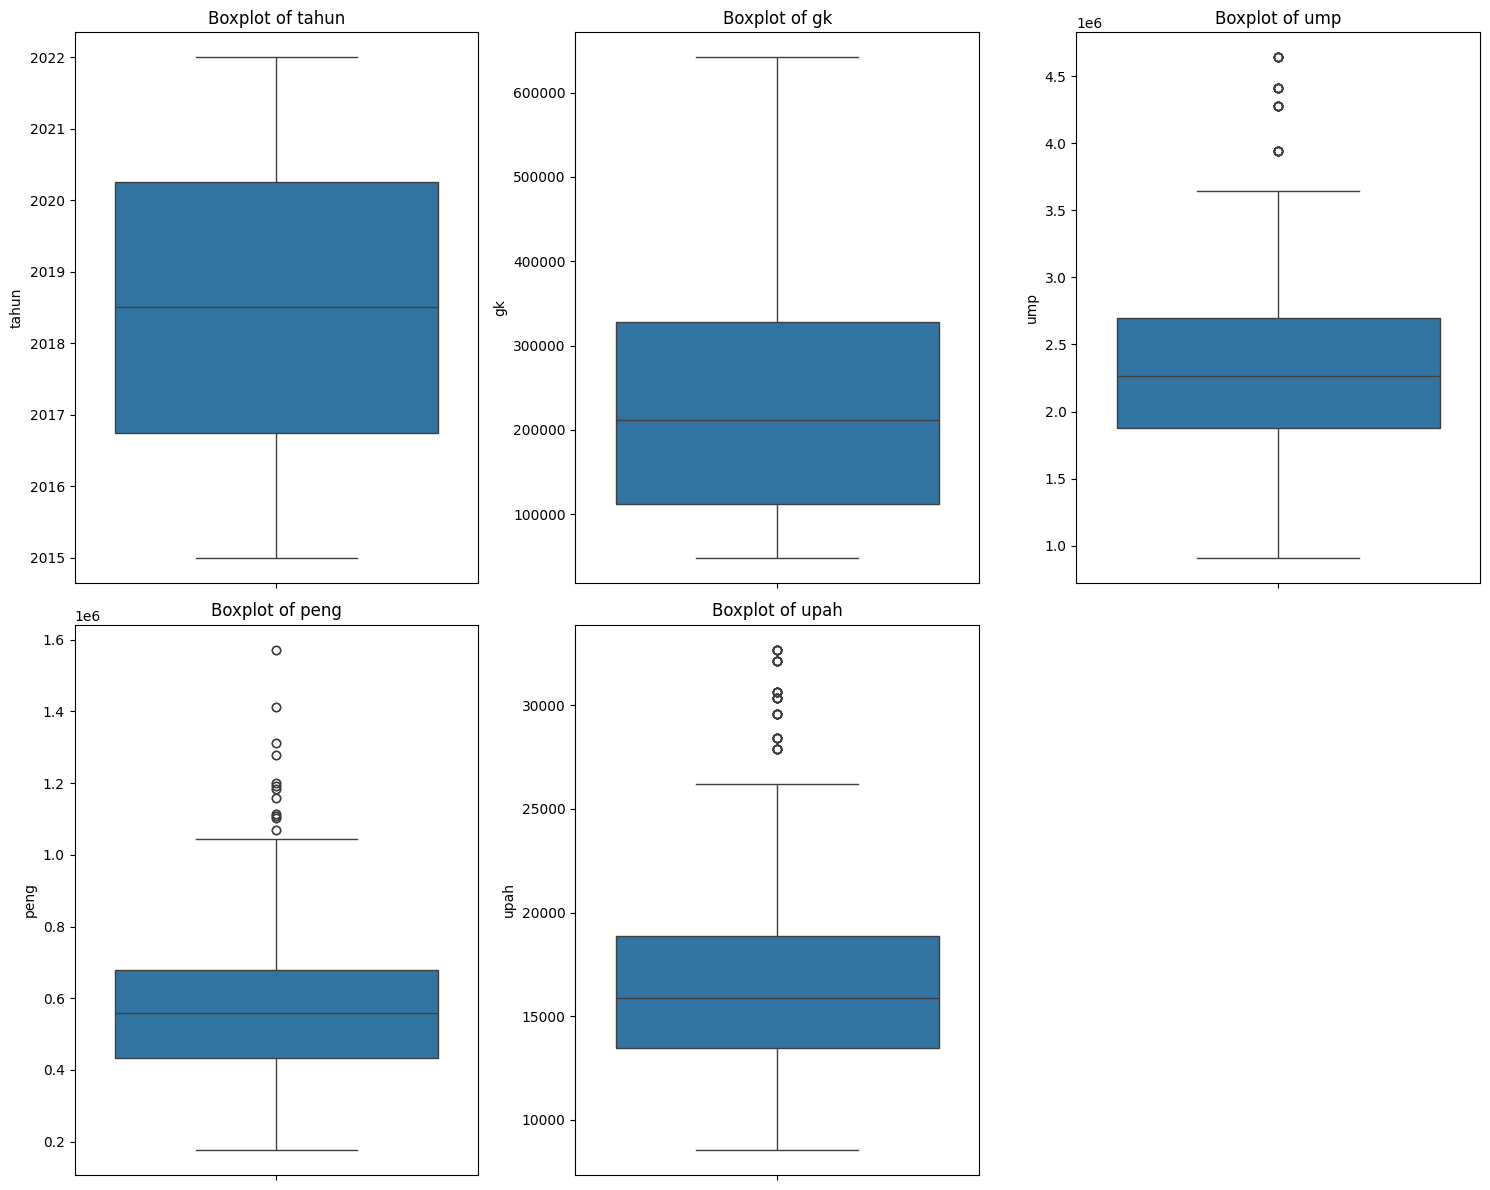

In [ ]:
# Create boxplots for numeric features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:6]):  # Limit to first 6 for readability
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

1. Tahun

  Data ranges from 2015 to 2022.

  Distribution is fairly uniform → menunjukkan data tersebar merata sepanjang waktu, no outliers.

2. GK (Garis Kemiskinan)

  Median around 210,000.

  Data is right-skewed → Some regions have a much higher poverty line than others.

  Outliers are visible at the top → indicating areas with very expensive basic necessities.

3. UMP
  
  Median is around 2.3 million.

  Spreading distribution with some outliers at the top → some provinces set very high UMP.

  There is a large gap between Q3 and the outliers → indicative of quite extreme differences in UMP policy.

4. peng

  Median is around 550k.

  Many outliers at the top → some areas have a very high cost of living compared to the average.

  Slightly right-skewed distribution → in line with high spending in certain areas.

5. Upah

  Median is around 16,000-17,000.

  Many outliers above → workers in certain regions receive much higher wages.

  The right-skewed distribution also → shows wage inequality between regions.

**Main Insight:**

The variables ump, peng, and upah have significant outliers, indicating economic inequality between daerah.

High upah are unevenly distributed, possibly influenced by cost of living and daerah policies.

tahun distribution is stable, suitable for time-series analysis.

In [ ]:
# Show value counts for categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for provinsi:
provinsi
ACEH                    64
SUMATERA UTARA          64
SUMATERA BARAT          64
RIAU                    64
JAMBI                   64
SUMATERA SELATAN        64
BENGKULU                64
LAMPUNG                 64
KEP. BANGKA BELITUNG    64
KEP. RIAU               64
DKI JAKARTA             64
JAWA BARAT              64
JAWA TENGAH             64
DI YOGYAKARTA           64
JAWA TIMUR              64
BANTEN                  64
BALI                    64
NUSA TENGGARA BARAT     64
NUSA TENGGARA TIMUR     64
KALIMANTAN BARAT        64
KALIMANTAN TENGAH       64
KALIMANTAN SELATAN      64
KALIMANTAN TIMUR        64
KALIMANTAN UTARA        64
SULAWESI UTARA          64
SULAWESI TENGAH         64
SULAWESI SELATAN        64
SULAWESI TENGGARA       64
GORONTALO               64
SULAWESI BARAT          64
MALUKU                  64
MALUKU UTARA            64
PAPUA BARAT             64
PAPUA                   64
Name: count, dtype: int64

Value counts for j

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop rows with missing values (if any)
df = df.dropna().reset_index(drop=True)

Missing values in each column:
provinsi     0
jenis        0
daerah       0
tahun        0
periode      0
gk          32
ump          0
peng        32
upah         0
dtype: int64


In [ ]:
# Check for duplicated rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


There are no duplicate rows, so we don't need to remove duplicate data.

In [ ]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Create a summary table of IQR for each numeric column
outlier_summary = pd.DataFrame(columns=["Outliers Count", "Outliers Percentage"])

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    outliers_percentage = (outliers_count / len(df)) * 100

    outlier_summary.loc[col] = [outliers_count, outliers_percentage]

# Display the summary table
print(outlier_summary)

       Outliers Count  Outliers Percentage
tahun             0.0             0.000000
gk                0.0             0.000000
ump              20.0             0.932836
peng             24.0             1.119403
upah             44.0             2.052239


Since the number of outliers is small, we will remove the outliers.

In [ ]:
# Create a copy of the original dataframe
df_clean = df.copy()

# Remove outliers for each numeric column using IQR bounds
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Display the shape of the cleaned DataFrame
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_clean.shape)


Shape before removing outliers: (2144, 9)
Shape after removing outliers: (2044, 9)


Next we do data standardization and normalization.

In [ ]:
df_cleaned=df_clean.copy()
# Select numeric features only for scaling
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# === Standardization (Z-Score) ===
scaler = StandardScaler()
df_cleaned[numeric_features] = scaler.fit_transform(df_cleaned[numeric_features])

# === Normalization (Min-Max) ===
normalizer = MinMaxScaler()
df_cleaned[numeric_features] = normalizer.fit_transform(df_cleaned[numeric_features])

Furthermore, since the ML algorithm cannot process categorical data, we will do encoding.

Note that since there are only 2 options for the type and region features, we do one-hot encoding.
As for the remaining categorical features, we do label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the cleaned DataFrame
df_encoded = df_cleaned.copy()

# One-Hot Encoding for 'jenis' and 'daerah'
df_encoded = pd.get_dummies(df_encoded, columns=['jenis', 'daerah'], drop_first=True)

# Label Encoding for other categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

# Exclude 'jenis' and 'daerah' since they've been one-hot encoded
categorical_cols = [col for col in categorical_cols if col not in ['jenis', 'daerah']]

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check the encoded DataFrame
print(df_encoded.head())
df_encoded.info()

   provinsi     tahun  periode        gk       ump      peng      upah  \
0         0  0.000000        0  0.413212  0.361573  0.342770  0.156935   
1         0  0.000000        1  0.427424  0.361573  0.342770  0.156935   
2         0  0.142857        0  0.434360  0.441375  0.440170  0.296438   
3         0  0.142857        1  0.457159  0.441375  0.440170  0.296438   
4         0  0.000000        0  0.419587  0.361573  0.258686  0.156935   

   jenis_NONMAKANAN  daerah_PERKOTAAN  
0             False              True  
1             False              True  
2             False              True  
3             False              True  
4             False             False  
<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 0 to 2143
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   provinsi          2044 non-null   int64  
 1   tahun             2044 non-null   float64
 2   periode           204

# **6. Pembangunan Model Clustering**

## **a. Building Clustering Model**

Okay, then let's build the clustering model first.

But because in building the model, there must be parameters, so here I fill in only as an example, later when evaluated, it will be determined again.

Here I tried 2 models, agglo and k-means. Actually I tried DBSCAN too, but it resulted in hundreds of clusters even though the silhouette score was high (and I also got stuck for a long time here, that is why i late huhu).

In [ ]:
# For example
k=2

# K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k)

## **b. Model Clustering Evaluation**

Okay, let's evaluate the model.

Here I try the k value for each model from 2 to 10, the goal is to find the best silhouette score to maximize clustering performance, although it does make a lot of computation, but because there are only 2 thousand data here, the computation time is still not too long.

In [ ]:
# Store results for each model
kmeans_results = []
agglo_results = []

# K-Means: Try different values of k (2 to 11)
for k in range(2, 12):
    kmeans.fit(df_encoded)
    labels = kmeans.labels_

    # Calculate Silhouette Score (only if more than 1 cluster is formed)
    if len(set(labels)) > 1:
        score = silhouette_score(df_encoded, labels)
        kmeans_results.append({'Model': 'KMeans', 'k': k, 'Silhouette Score': score})

# Agglomerative Clustering: Try different values of n_clusters (2 to 11)
for k in range(2, 12):
    agglo.fit(df_encoded)
    labels = agglo.labels_

    # Calculate Silhouette Score (only if more than 1 cluster is formed)
    if len(set(labels)) > 1:
        score = silhouette_score(df_encoded, labels)
        agglo_results.append({'Model': 'Agglomerative', 'k': k, 'Silhouette Score': score})

# Create DataFrames from results
kmeans_df = pd.DataFrame(kmeans_results).sort_values('Silhouette Score', ascending=False).groupby('Model').head(1)
agglo_df = pd.DataFrame(agglo_results).sort_values('Silhouette Score', ascending=False).groupby('Model').head(1)

# Concatenate and display the results then Combine all results
all_results = pd.concat([kmeans_df, agglo_df]).sort_values('Silhouette Score', ascending=False)

# Print results in plain text
print("Clustering Model Evaluation Results:\n")
for idx, row in all_results.iterrows():
    model = row['Model']
    score = row['Silhouette Score']
    print(f"{model} with k = {int(row['k'])} → Silhouette Score: {score:.4f}")

Clustering Model Evaluation Results:

KMeans with k = 2 → Silhouette Score: 0.6075
Agglomerative with k = 2 → Silhouette Score: 0.5860


Turns out the K-Means model is better than agglo, although the difference is not significance far.

But i wanna improve this silhouette score with feature selection, maybe it will increase the score.

## **c. Feature Selection (Opsional)**

Lets do PCA. Here i use n_components=2 so that the visualization can be simple (2D)

In [ ]:
pca = PCA(n_components=2)
df_pca = df_encoded.copy()
df_pca = pca.fit_transform(df_encoded)

And now lets retry the algorithm.

In [ ]:
# Store results for each model
kmeans_results = []
agglo_results = []

# K-Means: Try different values of k (2 to 11)
for k in range(2, 12):
    kmeans.fit(df_pca)
    labels = kmeans.labels_

    # Calculate Silhouette Score (only if more than 1 cluster is formed)
    if len(set(labels)) > 1:
        score = silhouette_score(df_pca, labels)
        kmeans_results.append({'Model': 'KMeans', 'k': k, 'Silhouette Score': score})

# Agglomerative Clustering: Try different values of n_clusters (2 to 11)
for k in range(2, 12):
    agglo.fit(df_pca)
    labels = agglo.labels_

    # Calculate Silhouette Score (only if more than 1 cluster is formed)
    if len(set(labels)) > 1:
        score = silhouette_score(df_pca, labels)
        agglo_results.append({'Model': 'Agglomerative', 'k': k, 'Silhouette Score': score})

# Create DataFrames from results
kmeans_df = pd.DataFrame(kmeans_results).sort_values('Silhouette Score', ascending=False).groupby('Model').head(1)
agglo_df = pd.DataFrame(agglo_results).sort_values('Silhouette Score', ascending=False).groupby('Model').head(1)

# Concatenate and display the results then Combine all results
all_results = pd.concat([kmeans_df, agglo_df]).sort_values('Silhouette Score', ascending=False)

# Print results in plain text
print("Clustering Model Evaluation Results: (Considering best parameters)\n")
for idx, row in all_results.iterrows():
    model = row['Model']
    score = row['Silhouette Score']
    print(f"{model} with k = {int(row['k'])} → Silhouette Score: {score:.4f}")

Clustering Model Evaluation Results: (Considering best parameters)

KMeans with k = 2 → Silhouette Score: 0.6190
Agglomerative with k = 2 → Silhouette Score: 0.6154


Turns out the score is improved but not that high, it's okay, maybe the data can't be clustered more.

## **d. Visualization Results**

After everything is done, now let's visualize it.

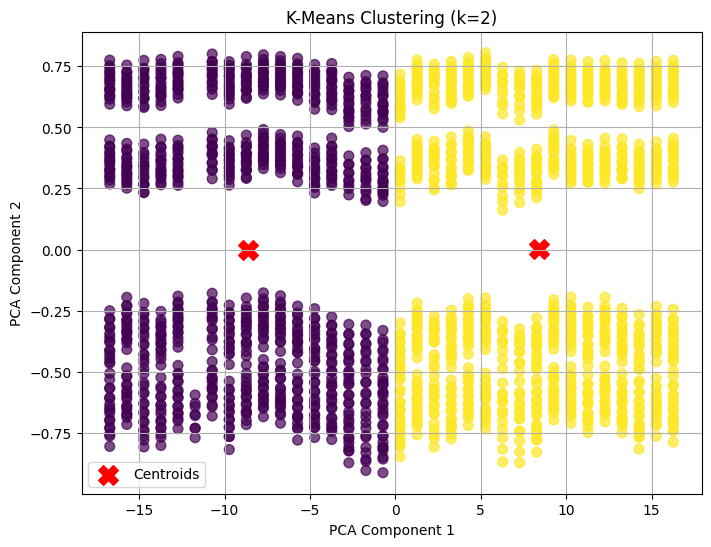

In [ ]:
k = 2

# Fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering (k={k})')
plt.legend()
plt.grid(True)
plt.show()


## **e. Analysis and Interpretation of Cluster Results**

### Target Interpretation

In [ ]:
# Add cluster labels to df_pca
df_clustered = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_clustered['Cluster'] = kmeans.labels_

# Add cluster labels to df_encoded
df_encoded_clustered = df_encoded.copy()
df_encoded_clustered['Cluster'] = kmeans.labels_

# Inverse transform of standardized and normalized numerical features
df_original_restored = df_clean.copy()
df_original_restored[numeric_features] = scaler.inverse_transform(
    normalizer.inverse_transform(df_cleaned[numeric_features])
)

# Inverse transform label encoded columns
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df_clean[col])
    df_encoded_clustered[col] = le.inverse_transform(df_encoded_clustered[col])

# Combine with PCA (optional) and cluster features
df_final = df_original_restored.copy()
df_final['Cluster'] = df_encoded_clustered['Cluster']


print(df_final.head())

  provinsi    jenis     daerah   tahun    periode        gk        ump  \
0     ACEH  MAKANAN  PERKOTAAN  2015.0      MARET  293697.0  1900000.0   
1     ACEH  MAKANAN  PERKOTAAN  2015.0  SEPTEMBER  302128.0  1900000.0   
2     ACEH  MAKANAN  PERKOTAAN  2016.0      MARET  306243.0  2118500.0   
3     ACEH  MAKANAN  PERKOTAAN  2016.0  SEPTEMBER  319768.0  2118500.0   
4     ACEH  MAKANAN  PERDESAAN  2015.0      MARET  297479.0  1900000.0   

       peng     upah  Cluster  
0  466355.0  11226.0        0  
1  466355.0  11226.0        0  
2  548853.0  13627.0        0  
3  548853.0  13627.0        0  
4  395136.0  11226.0        0  


Wow it worked! Yeayy horee

Next, we will find out the interpretation of each cluster.

Let's find out by finding the mean and dominant value of the region.

In [ ]:
# Average numeric features per cluster
cluster_means = df_final.groupby('Cluster').mean(numeric_only=True)
cluster_means = cluster_means.drop(columns=['tahun'])  # Exclude 'tahun' column

# Dominance of 'regions' per cluster
dominant_daerah = df_final.groupby('Cluster')['daerah'].agg(lambda x: x.value_counts().idxmax())

# List of provinces per cluster
provinsi_list = df_final.groupby('Cluster')['provinsi'].unique()

# Merge everything into one view
for cluster in sorted(df_final['Cluster'].unique()):
    print(f"\n=== Cluster {cluster} ===")

    # Regional dominance
    print(f"Dominant 'daerah': {dominant_daerah[cluster]}")

    # Average numeric features (excluding 'tahun')
    print("\nMean of numeric features:")
    means = cluster_means.loc[cluster]
    for col, val in means.items():
        print(f"- {col}: {val:,.2f}")

    # List provinsi
    print("\nList of Provinces:")
    for prov in provinsi_list[cluster]:
        print(f"- {prov}")


=== Cluster 0 ===
Dominant 'daerah': PERKOTAAN

Mean of numeric features:
- gk: 232,458.62
- ump: 2,169,649.93
- peng: 581,263.02
- upah: 15,931.57

List of Provinces:
- ACEH
- JAMBI
- BENGKULU
- KEP. BANGKA BELITUNG
- DKI JAKARTA
- JAWA BARAT
- JAWA TENGAH
- DI YOGYAKARTA
- JAWA TIMUR
- BANTEN
- BALI
- KALIMANTAN BARAT
- KALIMANTAN TENGAH
- KALIMANTAN SELATAN
- KALIMANTAN TIMUR
- KALIMANTAN UTARA
- GORONTALO

=== Cluster 1 ===
Dominant 'daerah': PERDESAAN

Mean of numeric features:
- gk: 218,494.05
- ump: 2,318,064.14
- peng: 532,674.38
- upah: 16,135.16

List of Provinces:
- SUMATERA UTARA
- SUMATERA BARAT
- RIAU
- SUMATERA SELATAN
- LAMPUNG
- KEP. RIAU
- NUSA TENGGARA BARAT
- NUSA TENGGARA TIMUR
- SULAWESI UTARA
- SULAWESI TENGAH
- SULAWESI SELATAN
- SULAWESI TENGGARA
- SULAWESI BARAT
- MALUKU
- MALUKU UTARA
- PAPUA BARAT
- PAPUA


## Cluster Characteristic Analysis of KMeans Model
The following is a characteristic analysis for each cluster generated from the KMeans model based on region, salary, expenditure, and wage data.

### Cluster 0:
Average Gross Salary (gk): Rp232,458.62

Average Provincial Minimum Wage (ump): IDR2,169,649.93

Average Expenses (peng): Rp581,263.02

Average Wage (wage): IDR15,931.57

Regional Dominance: CITY

List of Provinces: Java, Kalimantan, Jakarta, Bali, and some other western regions

Analysis:
This cluster represents urban areas that have higher average expenditures and gross salaries than other clusters. Although the provincial minimum wage is slightly lower, purchasing power appears to be active with relatively high consumption. These areas likely have greater access to infrastructure, formal employment, and urban lifestyles.

### Cluster 1:
Average Gross Salary (gk): IDR 218,494.05

Average Provincial Minimum Wage (ump): IDR2,318,064.14

Average Expenses (peng): Rp532,674.38

Average Wage (wage): IDR16,135.16

Regional Dominance: RURAL

List of Provinces: Papua, Nusa Tenggara, Maluku, Sulawesi, and parts of Sumatra

**Analysis**:
This cluster represents rural and island areas that have higher provincial minimum wages and average wages, but lower expenditure than urban clusters. This could indicate the role of government interventions to improve living standards, although people's consumption patterns are not the same.

# **7. Export Data**

In [ ]:
# Export to CSV
df_final.to_csv('Dataset_inisiasi.csv', index=False)
print("Data successfully exported to 'Dataset_inisiasi.csv''")

Data successfully exported to 'Dataset_inisiasi.csv''
